# **Clients segmentation**

### ***RFM (Recency, Frequency, Monetary)***: The RFM model is a customer segmentation technique that uses Recency, Frequency, and Monetary Value to classify customers into groups based on their buying and interaction behavior.

### ***Recency (R)***: Evaluates Recency by assigning a higher score to customers who made a more recent purchase and a lower score to customers who haven't interacted with the company in a long time.

### ***Frequency (F)***: Measures how often a customer makes purchases or interacts with the company. Customers who purchase more frequently receive a higher score.

### ***Monetary Value (M)***: Evaluates the monetary value of a customer's purchases. Customers who spend more receive a higher score.

### Customer Segmentation: Based on RFM values, customers can be divided into different segments. For example, customers with high Recency, high Frequency, and high Monetary Value scores are considered the most valuable, while those with low scores in all three categories may be considered inactive.

### Use in Marketing Strategies: Recency is often used to identify customers who may be inactive or on the verge of churning so that targeted marketing actions can be taken to re-engage them. For example, sending special offers to inactive customers who made a purchase a long time ago.


## 1. Importing libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
from datetime import datetime


# 2. Load the data

In [30]:
df = pd.read_csv("/Users/vitoriawillanidealmeida/Desktop/DATA SCIENCE/Projetos próprios/Costumer_Segmentation/data.csv", encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [31]:
df.shape

(541909, 8)

# 3. Data analysis

We have 541909 observations and 8 features

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Our objective is client segmentation, so we need to drop the observations without `CustomerID`:

In [33]:
df = df.dropna(subset=['CustomerID'], axis=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


We will transform the column `InvoiceDate` into a date time object:

In [34]:
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])

In [35]:
len(df["StockCode"].unique())

3684

Now we are going to create a segmentation for our clients based on frequency of purchase

In [36]:
df_recency = (
    df[["InvoiceDate", "CustomerID"]]
    .groupby("CustomerID")["InvoiceDate"] 
    .agg("max") 
    .reset_index()
)

df_recency.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


I will use the maximum date in `InvoiceDate` as reference

In [37]:
cur_time = df_recency.InvoiceDate.max()
cur_time

Timestamp('2011-12-09 12:50:00')

# 3.1 Recency 

In [38]:
def month_diff( cur_time, datetime_val):
    return 12*(cur_time.year - datetime_val.year)+(cur_time.month - datetime_val.month)

In [39]:
df_recency["Recency"] = df_recency["InvoiceDate"].apply(lambda datetime_val: month_diff(cur_time, datetime_val))
df_recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,11
1,12347.0,2011-12-07 15:52:00,0
2,12348.0,2011-09-25 13:13:00,3
3,12349.0,2011-11-21 09:51:00,1
4,12350.0,2011-02-02 16:01:00,10


We can see that the majority of clients made a purchase in the last 4 months.

Text(0.5, 1.0, 'Recency counts')

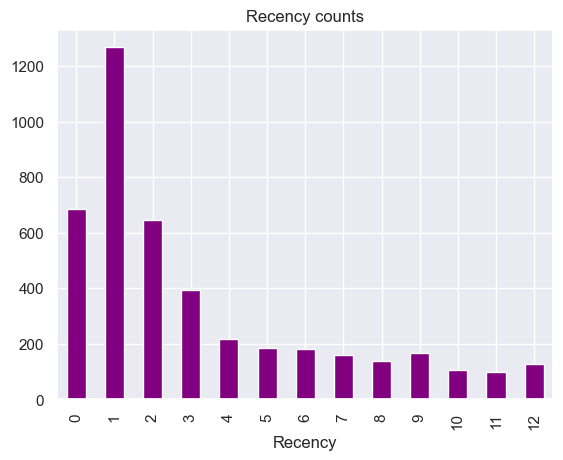

In [40]:
sns.set(style="darkgrid")
colors = sns.color_palette("viridis")

df_recency["Recency"].value_counts().sort_index().plot.bar(color= "purple")
plt.title("Recency counts")

<Axes: ylabel='Recency'>

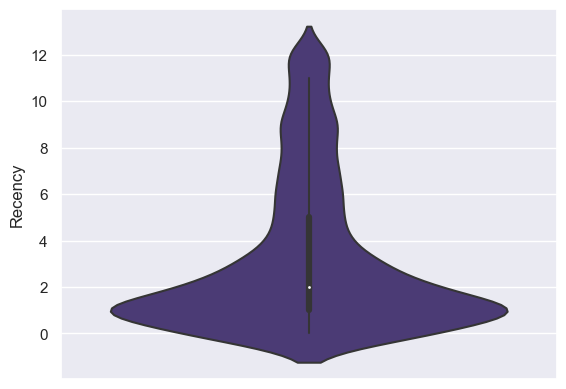

In [41]:
sns.violinplot(data=df_recency, y="Recency", palette=colors)

# 3.2 Frequency

In [42]:
df_frequency = df.groupby("CustomerID")["InvoiceNo"].agg(Frequency="count").reset_index()

df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [43]:
df_frequency = df_frequency.sort_values(by='Frequency', ascending=False)
df_frequency.head(50)

,CustomerID,Frequency
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
2192,15311.0,2491
1703,14646.0,2085
568,13089.0,1857
698,13263.0,1677
1447,14298.0,1640


In [44]:
top_50_frequency = df_frequency.head(50)
top_50_frequency

,CustomerID,Frequency
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
2192,15311.0,2491
1703,14646.0,2085
568,13089.0,1857
698,13263.0,1677
1447,14298.0,1640


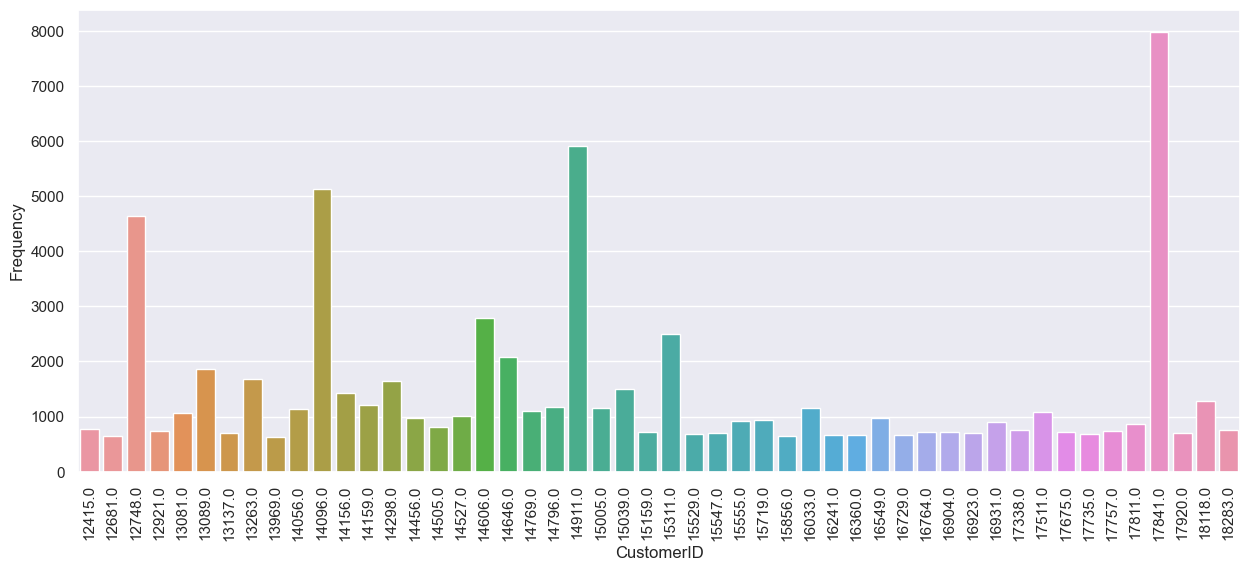

In [45]:
plt.figure(figsize=(15, 6))
g = sns.barplot( data= top_50_frequency, x = "CustomerID", y = "Frequency")
                
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()


### I recommend contacting and sending a gift to the 22 clients who have made more than 1000 purchases and inviting them to share the present on social media. This will make a good impression on the clients and may encourage other potential customers to buy our products.

### For the other top 50 costumers I recommend making contact and thanking them for their loyalty.

# 3.3 Monetary Value

In [46]:
df['Value'] = df["UnitPrice"] * df["Quantity"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [47]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Value
count,406829.000000,406829,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,427.591718


Some values of `Quantity` and `UnitPrice` don`t make sense, so we will drop this data.

In [48]:
df = df.query("UnitPrice > 0 and Quantity > 0")


In [49]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Value
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [50]:
df["Monetary"] = df.groupby("CustomerID")["Value"].transform('sum')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21


In [51]:
df_monetary = df[["CustomerID", "Monetary"]].drop_duplicates()
df_monetary

,CustomerID,Monetary
0,17850.0,5391.21
9,13047.0,3237.54
26,12583.0,7281.38
46,13748.0,948.25
65,15100.0,876.00
...,...,...
536969,13436.0,196.89
537255,15520.0,343.50
538064,13298.0,360.00
538812,14569.0,227.39


In [52]:
len(df["CustomerID"].unique())

4338

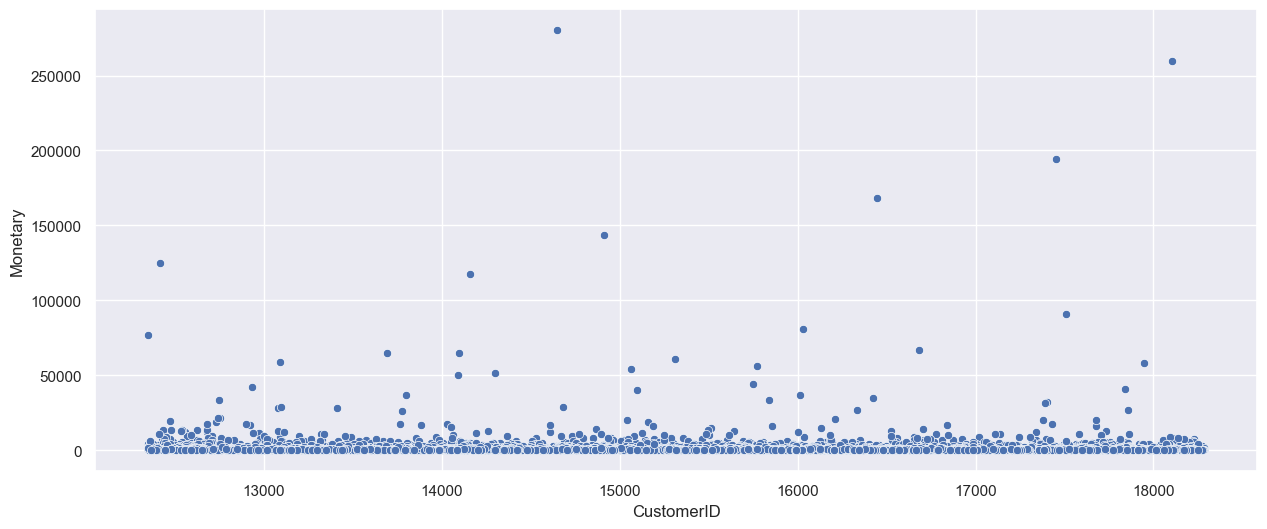

In [56]:
plt.figure(figsize=(15, 6))
g = sns.scatterplot(df_monetary, x = "CustomerID", y= "Monetary" )
plt.show()

Changing limits of y to facilitate visualization

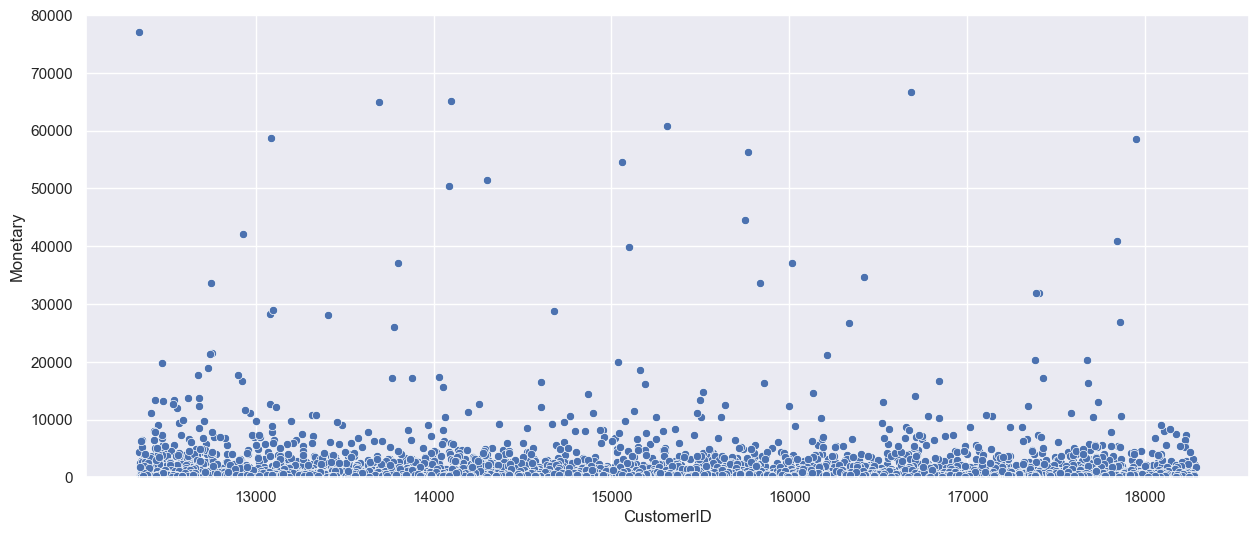

In [55]:
plt.figure(figsize=(15, 6))
g = sns.scatterplot(df_monetary, x = "CustomerID", y= "Monetary" )
g.set_ylim(0, 80000)
plt.show()


<Axes: >

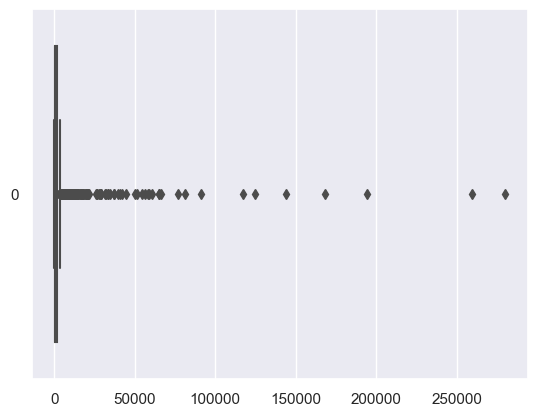

In [61]:
sns.boxplot(data = df_monetary["Monetary"], orient= "h")

First Quartil (Q1): 307.41499999999996
Second Quartil (Q2): 674.485
Third Quartil (Q3): 1661.7400000000002


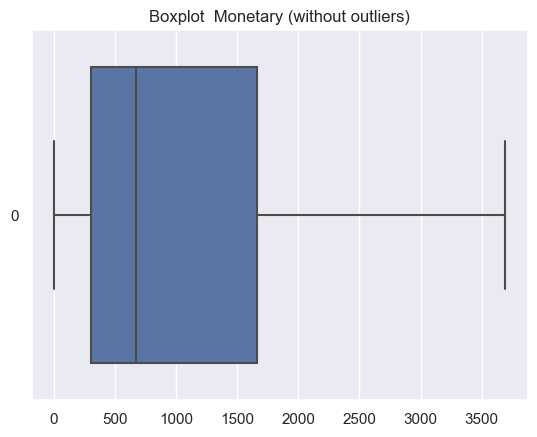

In [67]:
sns.boxplot(data=df_monetary["Monetary"], orient="h", showfliers=False)

quartis = df_monetary["Monetary"].quantile([0.25, 0.5, 0.75])

print("First Quartil (Q1):", quartis[0.25])
print("Second Quartil (Q2):", quartis[0.5])
print("Third Quartil (Q3):", quartis[0.75])

plt.title("Boxplot  Monetary (without outliers)")
plt.show()

In [79]:
merged_temp = pd.merge(df_monetary, df_frequency, on="CustomerID")
df_final = pd.merge(merged_temp, df_recency, on="CustomerID")
df_final = df_final.drop("InvoiceDate", axis=1)
df_final

,CustomerID,Monetary,Frequency,Recency
0,17850.0,5391.21,312,10
1,13047.0,3237.54,196,1
2,12583.0,7281.38,251,0
3,13748.0,948.25,28,3
4,15100.0,876.00,6,11
...,...,...,...,...
4333,13436.0,196.89,12,0
4334,15520.0,343.50,18,0
4335,13298.0,360.00,2,0
4336,14569.0,227.39,12,0


# 4. Client's segmentation

In [80]:
from sklearn.preprocessing import StandardScaler

feature_cols = ['Recency','Frequency','Monetary' ]

# standardized df for training
standardized_data = df_final.copy()

# standardization
scaler = StandardScaler()
scaler.fit(df_final[feature_cols])
standardized_features = scaler.transform(df_final[feature_cols])
standardized_data[feature_cols] = standardized_features

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

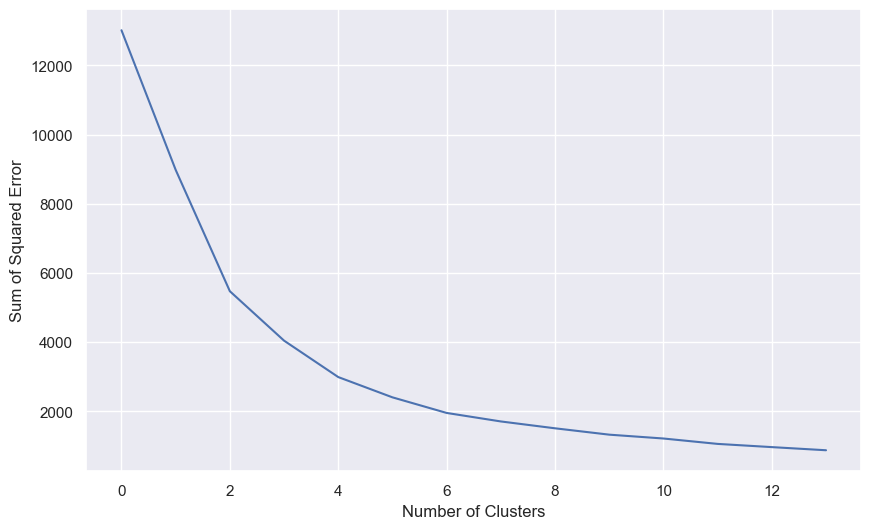

In [81]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(standardized_data[feature_cols])
    sse.append(kmeans.inertia_)
    
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sse)

plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

In [87]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(standardized_data[feature_cols])
df_final["Cluster"] = kmeans.labels_
df_final.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Monetary,Frequency,Recency,Cluster
0,17850.0,5391.21,312,10,0
1,13047.0,3237.54,196,1,4
2,12583.0,7281.38,251,0,1
3,13748.0,948.25,28,3,4
4,15100.0,876.00,6,11,0


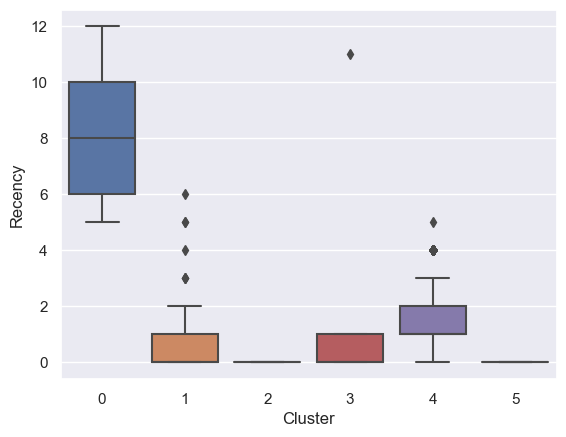

In [88]:
C = sns.boxplot(x='Cluster', y='Recency', data=df_final)

In [89]:
# Vamos verificar as metricas por cluster
centroid_df = (
    df_final.groupby("Cluster")
  [["CustomerID", "Recency", "Frequency", "Monetary"]]
    .agg(
        {
          "CustomerID": "nunique",
          "Recency": "mean",
          "Frequency": "mean",
          "Monetary": "mean",  
        }
    )
    .reset_index()
)

# Renomeamos a feature CustomerID 
centroid_df = centroid_df.rename(columns={"CustomerID": "N_Buyers"})

# Vamos ordenar por recencia
centroid_df.sort_values(by="Recency", ascending=True)

,Cluster,N_Buyers,Recency,Frequency,Monetary
2,2,4,0.000000,5914.000000,70925.287500
5,5,4,0.000000,718.250000,225721.652500
1,1,357,0.602241,401.983193,7223.403137
3,3,15,1.000000,960.800000,68421.666000
4,4,2833,1.555595,66.723262,1237.033880
0,0,1125,8.040000,29.568000,546.865112


In [93]:
# naming clusters
seg_map = [
    "Possible churn clients",
    "Excellent Recency and good frequency clients",
    "Most frequent clients",
    "Excellent frequency and great recency clients",
    " Regular clients",
    'Highest monetary clients'
]


centroid_df['Segment'] = seg_map
centroid_df

,Cluster,N_Buyers,Recency,Frequency,Monetary,Segment
0,0,1125,8.040000,29.568000,546.865112,Possible churn clients
1,1,357,0.602241,401.983193,7223.403137,Excellent Recency and good frequency clients
2,2,4,0.000000,5914.000000,70925.287500,Most frequent clients
3,3,15,1.000000,960.800000,68421.666000,Excellent frequency and great recency clients
4,4,2833,1.555595,66.723262,1237.033880,Regular clients
5,5,4,0.000000,718.250000,225721.652500,Highest monetary clients
